In [1]:
%matplotlib inline
import numpy as np
import scipy.stats as stats 
import math
from scipy.stats import lognorm
from scipy.optimize import curve_fit  
from matplotlib import pyplot as plt

In [11]:
import pylab
params = {'backend': 'ps',
          'axes.labelsize': 43.5,
          'legend.fontsize': 43.5,
          'legend.handlelength': 2.0,
          'legend.borderaxespad': 0,
          'xtick.labelsize': 43.5,
          'ytick.labelsize': 43.5,
          'font.family': 'serif',
          'font.size': 43.5,
          'font.weight': 'normal',
          #'font.serif': ['Palatino'],
          'ps.usedistiller': 'xpdf',
          'text.usetex': False}
pylab.rcParams.update(params)


## Truncated gamma CDF of normalized aggregate size compared to literature.

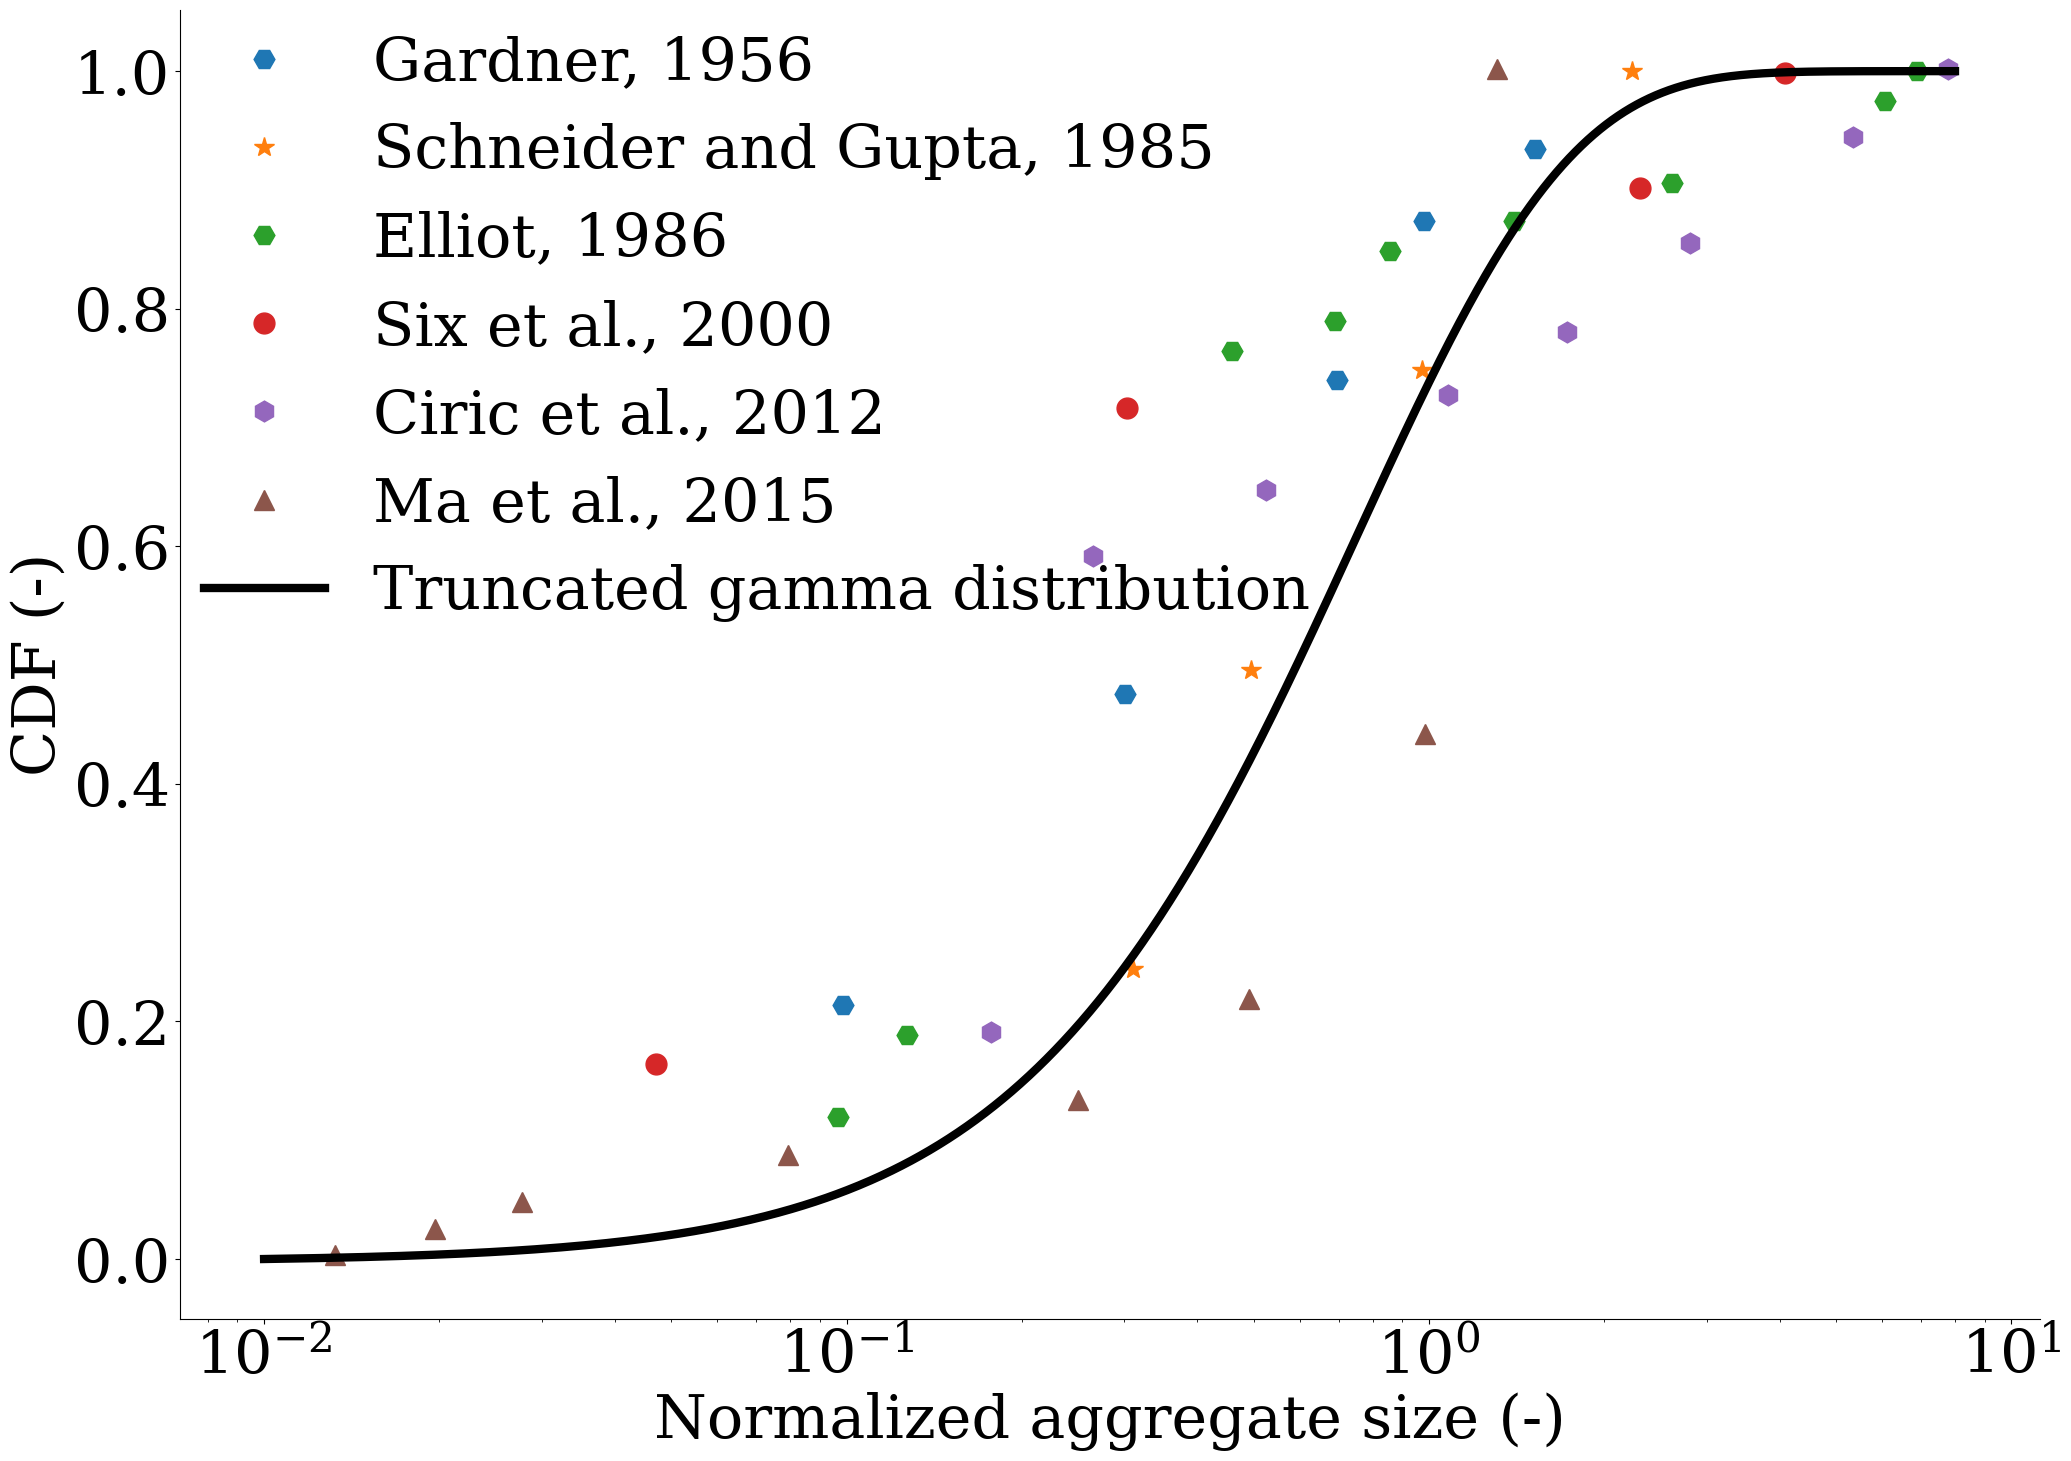

In [15]:
fig = plt.figure(figsize=(24,17))
ax1 = fig.add_subplot(111)

# # Literature data

x1 = np.array([0.098728536,0.300206387,0.696212847,0.980524317,1.517851842])
y1 = np.array([0.213903743,0.475935829,0.739750446,0.873440285,0.934046346])

x2= np.array([0.310486796,0.494909481,0.971623666,2.230240836])
y2 = np.array([0.244206774,0.495543672,0.748663102,1])

x3 = np.array([0.096787753,0.126809825,0.458810805,0.688638509,0.856540218,1.397347822,2.610072384,6.065321475,6.871310066])
y3 = np.array([0.11942959,0.188948307,0.764705882,0.789661319,0.848484848,0.873440285,0.905525847,0.975044563,1])

x4 = np.array([0.047141302,0.302590952,2.303403596,4.08134463])
y4 = np.array([0.16399287,0.71657754,0.901960784,0.998217469])

x5= np.array([0.176986938,0.264604369,0.526004557,1.07855859,1.722747701,2.809005573,5.354171767,7.7862819])
y5 = np.array([0.190730838,0.591800357,0.647058824,0.727272727,0.780748663,0.855614973,0.944741533,1.001782531])

x6 = np.array([0.013246199,0.019676153,0.027743204,0.079431496,0.249758679,0.491191767,0.984941146,1.310914801])
y6 = np.array([0.003565062,0.024955437,0.048128342,0.087344029,0.13368984,0.219251337,0.442067736,1.001782531])


# # x is the aggregate size
x = np.linspace(0.01,8,10000)

# # Estimation of truncated gamma CDF for aggregate size
p1 = stats.gamma.cdf(x, a=1.5, scale=0.5) #(normal gamma distribution; a is alpha_Ra and scale is beta_Ra)
p2 = stats.gamma.cdf(0.01, a=1.5, scale=0.5) #(Gamma dist at the starting radius value; a is alpha_Ra and scale is beta_Ra)
p3 = stats.gamma.cdf(8, a=1.5, scale=0.5) #(Gamma dist at the end radius value; a is alpha_Ra and scale is beta_Ra)
yy = (p1-p2)/(p3-p2) # Equation for estimating CDF of a truncated gamma distribution

# # Literature data represented through markers and truncated gamma distribution through a solid line
ax1.plot(x1, y1, linestyle='None', marker='H',markersize=15,label='Gardner, 1956')
ax1.plot(x2, y2, linestyle='None', marker='*',markersize=15,label='Schneider and Gupta, 1985')
ax1.plot(x3, y3, linestyle='None', marker='H',markersize=15,label='Elliot, 1986')
ax1.plot(x4, y4, linestyle='None', marker='o',markersize=15,label='Six et al., 2000')
ax1.plot(x5, y5, linestyle='None', marker='h',markersize=15,label='Ciric et al., 2012')
ax1.plot(x6, y6, linestyle='None', marker='^',markersize=15,label='Ma et al., 2015')
ax1.plot(x, yy,color='black',linewidth = 6, label='Truncated gamma distribution')


ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_xlabel(r'Normalized aggregate size (-)')
ax1.set_ylabel(r'CDF (-)')
plt.xscale('log')
ax1.legend(frameon=False, loc="upper left")
plt.show()
